In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Survey_ Factors Affecting Muslim Marriage Success in Malaysia  (Responses) - Form Responses 1.csv")
df.head()

,Timestamp,What is your age range?,What is your gender?,What is your highest level of education?,What is your employment status?,What is your household monthly income (in RM)?,How long have you been married?,Do you and your spouse have a stable monthly income?,Do financial issues frequently cause conflict in your marriage?,"Do you and your spouse plan your finances together (e.g., budgeting, saving)?",...,How often do disagreements escalate into serious arguments?,Do you and your spouse share similar Islamic values and principles?,"How often do you engage in religious activities together (e.g., prayer, study)?",Does religion play a central role in your marriage?,How often do family members interfere in your marriage?,Do you feel pressured by societal expectations about marriage?,How supportive is your extended family toward your marriage?,"Overall, how satisfied are you with your marriage?",How would you rate your emotional well-being in your marriage?,Do you believe your marriage is stable and will last long-term?
0,5/9/2025 10:04:09,26–35,Male,Degree,Self-employed,RM3001–RM5000,Less than 1 year,Yes,3,Yes,...,3,Yes,3,3,3,Yes,3,3,3,Maybe
1,5/9/2025 10:06:49,36–45,Male,Master,Employed,RM5001–RM7000,7–10 years,Yes,2,Yes,...,2,Yes,2,4,1,No,4,4,4,Yes
2,5/9/2025 10:13:18,18–25,Male,Degree,Employed,RM3001–RM5000,Less than 1 year,Yes,2,Yes,...,2,Yes,4,4,3,No,4,4,4,Yes
3,5/9/2025 10:26:02,18–25,Male,Degree,Employed,RM3001–RM5000,1–3 years,Yes,3,Yes,...,3,Yes,4,5,3,No,5,5,5,Yes
4,5/9/2025 13:21:03,18–25,Male,Master,Employed,Above RM7000,1–3 years,Yes,2,Yes,...,2,Yes,2,5,2,No,3,5,4,Yes


- Remove Timestamp column because it is not important for data analysis.

In [ ]:
df = df.drop(columns=['Timestamp'])
df.head()

,What is your age range?,What is your gender?,What is your highest level of education?,What is your employment status?,What is your household monthly income (in RM)?,How long have you been married?,Do you and your spouse have a stable monthly income?,Do financial issues frequently cause conflict in your marriage?,"Do you and your spouse plan your finances together (e.g., budgeting, saving)?",How satisfied are you with your financial situation as a couple?,...,How often do disagreements escalate into serious arguments?,Do you and your spouse share similar Islamic values and principles?,"How often do you engage in religious activities together (e.g., prayer, study)?",Does religion play a central role in your marriage?,How often do family members interfere in your marriage?,Do you feel pressured by societal expectations about marriage?,How supportive is your extended family toward your marriage?,"Overall, how satisfied are you with your marriage?",How would you rate your emotional well-being in your marriage?,Do you believe your marriage is stable and will last long-term?
0,26–35,Male,Degree,Self-employed,RM3001–RM5000,Less than 1 year,Yes,3,Yes,3,...,3,Yes,3,3,3,Yes,3,3,3,Maybe
1,36–45,Male,Master,Employed,RM5001–RM7000,7–10 years,Yes,2,Yes,4,...,2,Yes,2,4,1,No,4,4,4,Yes
2,18–25,Male,Degree,Employed,RM3001–RM5000,Less than 1 year,Yes,2,Yes,4,...,2,Yes,4,4,3,No,4,4,4,Yes
3,18–25,Male,Degree,Employed,RM3001–RM5000,1–3 years,Yes,3,Yes,4,...,3,Yes,4,5,3,No,5,5,5,Yes
4,18–25,Male,Master,Employed,Above RM7000,1–3 years,Yes,2,Yes,4,...,2,Yes,2,5,2,No,3,5,4,Yes


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
yes_no_cols = [
    'Do you and your spouse have a stable monthly income?',
    'Do you and your spouse plan your finances together (e.g., budgeting, saving)?',
    'Do you and your spouse share similar Islamic values and principles?',
    'Do you feel pressured by societal expectations about marriage?',
    'Do you believe your marriage is stable and will last long-term?'
]

for col in yes_no_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Maybe': 0.5})

- Rename columns to make it less longer and easier for data analysis

In [ ]:
df.rename(columns={
    'What is your age range?': 'AgeRange',
    'What is your gender?': 'Gender',
    'What is your highest level of education?': 'Education',
    'What is your employment status?': 'Employment',
    'What is your household monthly income (in RM)?': 'Income',
    'How long have you been married?': 'YearsMarried',
    'Do you and your spouse have a stable monthly income?': 'StableIncome',
    'Do financial issues frequently cause conflict in your marriage?': 'FinanceConflict',
    'Do you and your spouse plan your finances together (e.g., budgeting, saving)?': 'FinancePlanning',
    'How satisfied are you with your financial situation as a couple?': 'FinanceSatisfaction',
    'How often do you and your spouse have open, meaningful conversations?\nLinear scale (1–5)': 'CommunicationFrequency',
    'Are you satisfied with how you and your spouse resolve conflicts?': 'ConflictResolution',
    'How often do disagreements escalate into serious arguments?': 'SeriousArguments',
    'Do you and your spouse share similar Islamic values and principles?': 'SameIslamicValues',
    'How often do you engage in religious activities together (e.g., prayer, study)?': 'ReligiousActivities',
    'Does religion play a central role in your marriage?': 'ReligionCentrality',
    'How often do family members interfere in your marriage?': 'FamilyInterference',
    'Do you feel pressured by societal expectations about marriage?': 'SocietalPressure',
    'How supportive is your extended family toward your marriage?': 'FamilySupport',
    'Overall, how satisfied are you with your marriage?': 'MarriageSatisfaction',
    'How would you rate your emotional well-being in your marriage?': 'EmotionalWellbeing',
    'Do you believe your marriage is stable and will last long-term?': 'MarriageStability'
}, inplace=True)

In [ ]:
df.head()

,AgeRange,Gender,Education,Employment,Income,YearsMarried,StableIncome,FinanceConflict,FinancePlanning,FinanceSatisfaction,...,SeriousArguments,SameIslamicValues,ReligiousActivities,ReligionCentrality,FamilyInterference,SocietalPressure,FamilySupport,MarriageSatisfaction,EmotionalWellbeing,MarriageStability
0,26–35,Male,Degree,Self-employed,RM3001–RM5000,Less than 1 year,1.0,3,1.0,3,...,3,1.0,3,3,3,1.0,3,3,3,0.5
1,36–45,Male,Master,Employed,RM5001–RM7000,7–10 years,1.0,2,1.0,4,...,2,1.0,2,4,1,0.0,4,4,4,1.0
2,18–25,Male,Degree,Employed,RM3001–RM5000,Less than 1 year,1.0,2,1.0,4,...,2,1.0,4,4,3,0.0,4,4,4,1.0
3,18–25,Male,Degree,Employed,RM3001–RM5000,1–3 years,1.0,3,1.0,4,...,3,1.0,4,5,3,0.0,5,5,5,1.0
4,18–25,Male,Master,Employed,Above RM7000,1–3 years,1.0,2,1.0,4,...,2,1.0,2,5,2,0.0,3,5,4,1.0


EDA

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AgeRange                50 non-null     object 
 1   Gender                  50 non-null     object 
 2   Education               50 non-null     object 
 3   Employment              50 non-null     object 
 4   Income                  50 non-null     object 
 5   YearsMarried            50 non-null     object 
 6   StableIncome            50 non-null     float64
 7   FinanceConflict         50 non-null     int64  
 8   FinancePlanning         50 non-null     float64
 9   FinanceSatisfaction     50 non-null     int64  
 10  CommunicationFrequency  50 non-null     int64  
 11  ConflictResolution      50 non-null     int64  
 12  SeriousArguments        50 non-null     int64  
 13  SameIslamicValues       50 non-null     float64
 14  ReligiousActivities     50 non-null     int6

,StableIncome,FinanceConflict,FinancePlanning,FinanceSatisfaction,CommunicationFrequency,ConflictResolution,SeriousArguments,SameIslamicValues,ReligiousActivities,ReligionCentrality,FamilyInterference,SocietalPressure,FamilySupport,MarriageSatisfaction,EmotionalWellbeing,MarriageStability
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.840000,3.120000,0.760000,3.580000,3.680000,3.660000,2.700000,0.86000,3.560000,3.820000,2.620000,0.360000,3.900000,3.840000,3.660000,0.780000
std,0.370328,1.099907,0.431419,0.991597,1.058301,1.061574,1.147313,0.35051,1.090965,1.082137,1.176123,0.484873,1.129385,1.075895,1.061574,0.352252
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.250000,1.000000,3.000000,3.000000,3.000000,2.000000,1.00000,3.000000,3.000000,2.000000,0.000000,3.000000,3.000000,3.000000,0.500000
50%,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.00000,4.000000,4.000000,2.500000,0.000000,4.000000,4.000000,4.000000,1.000000
75%,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,3.000000,1.00000,4.000000,5.000000,3.000000,1.000000,5.000000,5.000000,4.000000,1.000000
max,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.00000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,5.000000,1.000000


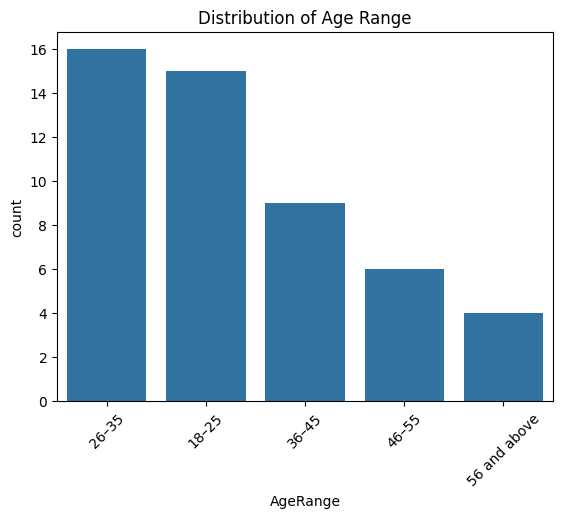

In [ ]:
# Age range
sns.countplot(data=df, x='AgeRange', order=df['AgeRange'].value_counts().index)
plt.title('Distribution of Age Range')
plt.xticks(rotation=45)
plt.show()

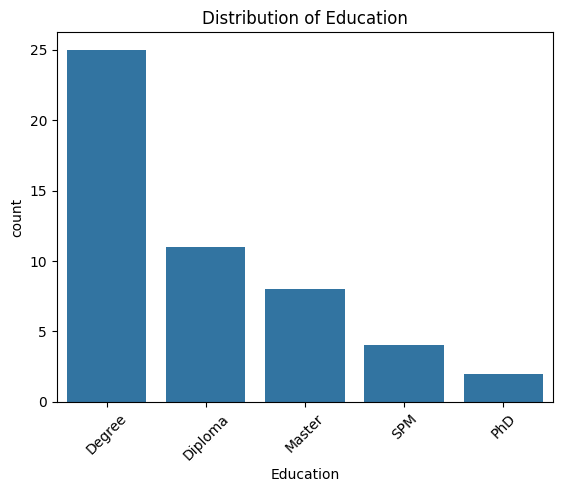

In [ ]:
# Education
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.show()

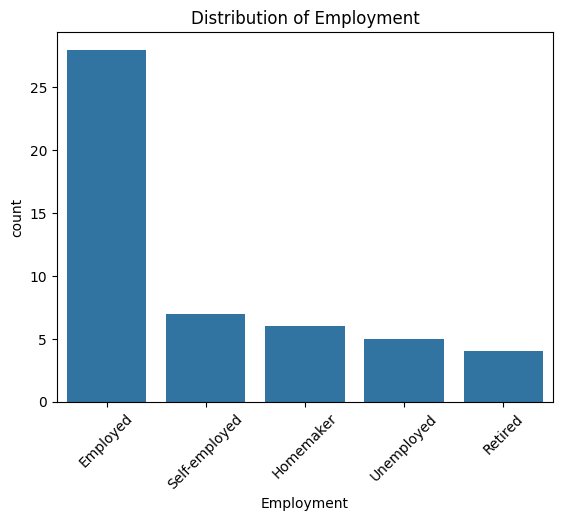

In [ ]:
# Employment
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.title('Distribution of Employment')
plt.xticks(rotation=45)
plt.show()

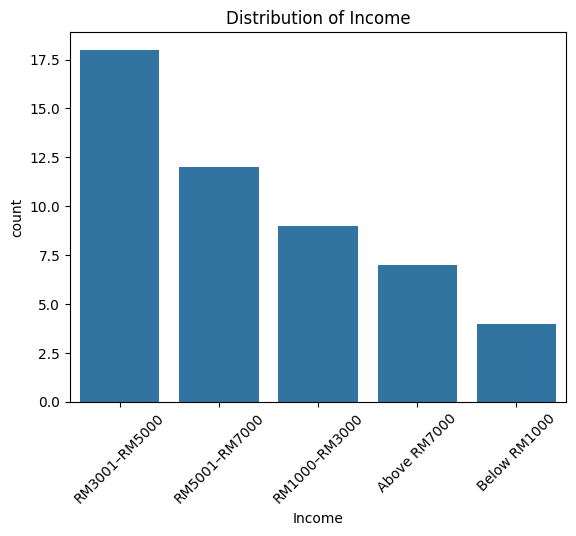

In [ ]:
# Income
sns.countplot(data=df, x='Income',order=df['Income'].value_counts().index)
plt.title('Distribution of Income')
plt.xticks(rotation=45)
plt.show()

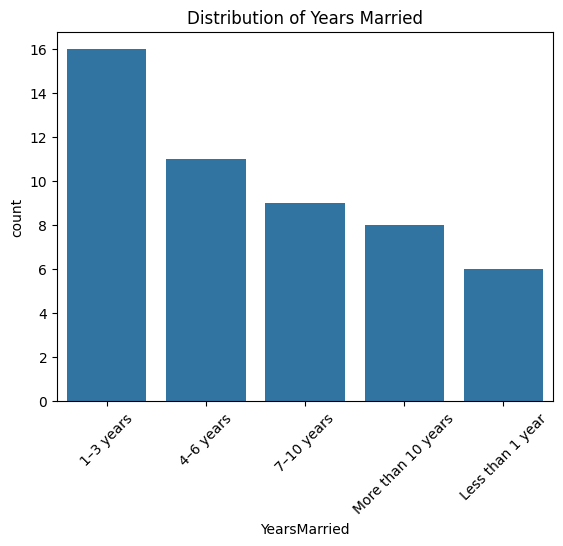

In [ ]:
# YearsMarried

sns.countplot(data=df, x='YearsMarried', order=df['YearsMarried'].value_counts().index)
plt.title('Distribution of Years Married')
plt.xticks(rotation=45)
plt.show()

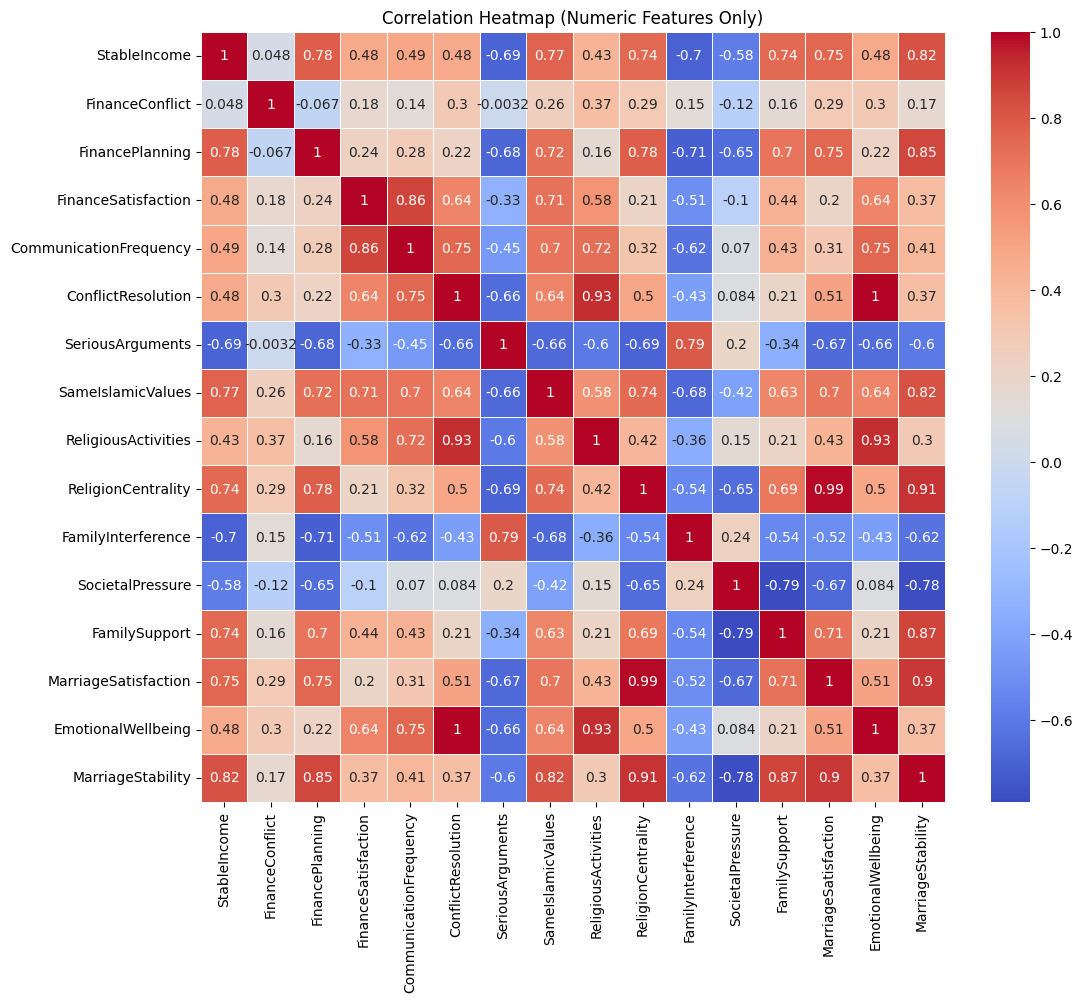

In [ ]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


- Using Random Forest Classifier as a Model for the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# To remove the "maybe" answer in target variables
df = df[df['MarriageStability']!=0.5]

target = 'MarriageStability'
features = [
    'StableIncome', 'FinanceConflict', 'FinancePlanning', 'FinanceSatisfaction',
    'CommunicationFrequency', 'ConflictResolution', 'SeriousArguments',
    'SameIslamicValues', 'ReligiousActivities', 'ReligionCentrality',
    'FamilyInterference', 'SocietalPressure', 'FamilySupport',
    'MarriageSatisfaction', 'EmotionalWellbeing'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Random Forest Classifier Model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



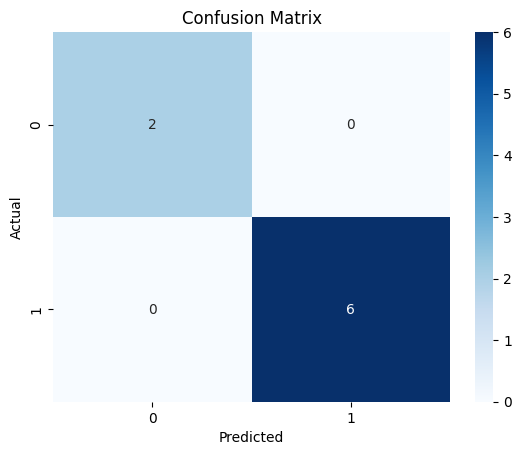

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

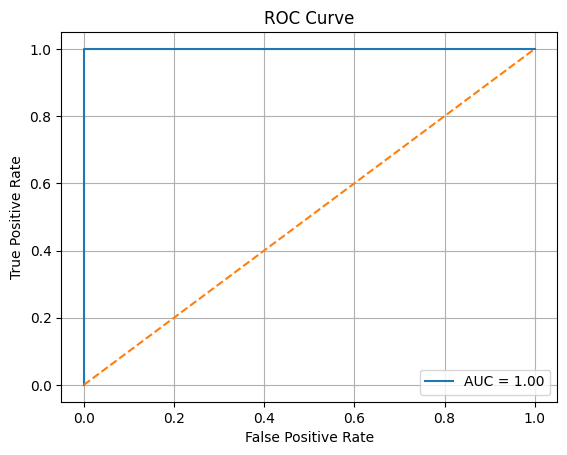

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

- Cross Validation Model

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

model_cv = RandomForestClassifier(n_estimators=100, random_state = 42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model_cv, X, y, cv=skf, scoring='accuracy')

print("Cross Validation scores for each fold:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross Validation scores for each fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


In [ ]:
# Evaluate with F1-score
f1_scores = cross_val_score(model_cv, X, y, cv=skf, scoring='f1')
print("\nF1-scores for each fold:", f1_scores)
print("Mean F1-score:", f1_scores.mean())

# Evaluate with ROC AUC
roc_scores = cross_val_score(model_cv, X, y, cv=skf, scoring='roc_auc')
print("\nROC AUC scores for each fold:", roc_scores)
print("Mean ROC AUC:", roc_scores.mean())



F1-scores for each fold: [1. 1. 1. 1. 1.]
Mean F1-score: 1.0

ROC AUC scores for each fold: [1. 1. 1. 1. 1.]
Mean ROC AUC: 1.0


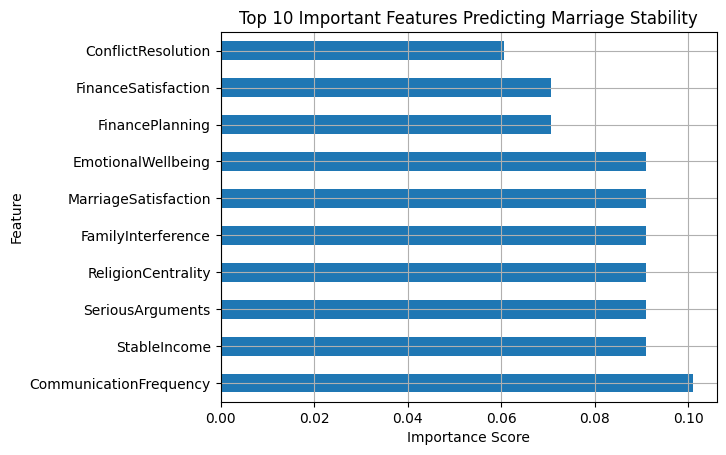

In [ ]:
# Feature Importance
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features Predicting Marriage Stability')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid()
plt.show()
